 # Сборный проект. Планирование рекламной компании.
Я сотрудник интернет-магазина, который продаёт по всему миру компьютерные игры.
Мне передан датасет с данными о продажах компьютерных игр до 2016 года. В нем содержится информация о оценке пользователей и экспертов, жанре игры, рейтинге и названии платформы. На основе этих данных необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <span style="background-color:yellow">Выявить лидеров и аутсайдеров по регионам, проверить некоторые гипотезы, определить портрет среднестатистического игрока, произвести анализ жанров, а также определить влияют ли оценки критиков и пользователей на показатель продаж игр. Собрать все воедино и произвести прогноз на 2017 год, опираясь на  вычисления и выводы которого, можно было повторить подобное исследовние через 5, 10 а то и больше лет.  
**P.S.** Для удобства - конец 2016 года будем считать моментом написания проекта. Повествование будет вестись в настоящем времени.</span>

###  Общая информация.

Для начала ознакомимся с данными, изучив первые 10 строк таблицы и общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wrn
wrn.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/datasets/games.csv')

In [ ]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод 1:** Считаю, что данные представлены в достаточном виде для исследования.В некоторых переменных присутствуют пропуски, а также указан неверный тип данных - для более четкого анализа необходимо произвести предобработку.

### Предобработка данных.

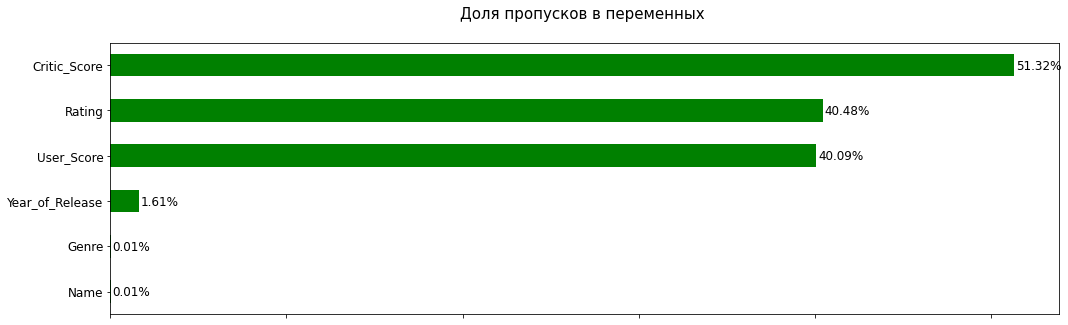

In [ ]:
data_gaps= (
    (data.isna().mean()*100)
    .to_frame().rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by = 'space', ascending = True)
)
data_gaps.space=data_gaps.space.round(2)
ax = data_gaps.plot(kind='barh', legend = None, figsize=(17,5), color='green',fontsize = 12)
for i, v in enumerate(data_gaps.space):
    ax.text(v+0.1, i-0.1, str(v)+'%', color='black', fontweight='normal',fontsize = 12)
ax.set_title('Доля пропусков в переменных '+'\n',fontsize = 15, color='black')
ax.set_xticklabels([]);

In [ ]:
data_year_miss=data.loc[data['Year_of_Release'].isnull()]

In [ ]:
data_year_miss.Name.unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

В некторых названиях содержится год выпуска - заполним пропуски значениями из названия игры.

In [ ]:
years_list=list(range(1980,2017))

In [ ]:
def fill_missing_years(df, years_list):
    for i, row in df.iterrows():
        if pd.isnull(row['Year_of_Release']) and any(str(y) in row['Name'] for y in years_list):
            df.loc[i, 'Year_of_Release'] = min(filter(lambda y: str(y) in row['Name'], years_list))
    return df

In [ ]:
data = fill_missing_years(data, years_list)

Изменим тип данных для лучшего восприятия значений.

In [ ]:
data['Year_of_Release']=data['Year_of_Release'].fillna(pd.NA).astype('Int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16463 non-null  Int64  
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Как можно заметить - небольшое количество пропущенных значений заполнено. Следующие переменные, на которые стоит обратить  внимание - Critic_Score и User_Score. Попробуем найти взаимосвязь.

In [ ]:
data_scores=data.loc[:,['Critic_Score','User_Score']]

In [ ]:
print(data_scores.info())
data_scores.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  8137 non-null   float64
 1   User_Score    10014 non-null  object 
dtypes: float64(1), object(1)
memory usage: 261.3+ KB
None


,Critic_Score,User_Score
0,76.0,8
1,NaN,NaN
2,82.0,8.3
3,80.0,8
4,NaN,NaN
5,NaN,NaN
6,89.0,8.5
7,58.0,6.6
8,87.0,8.4
9,NaN,NaN


Из наблюдения следует, что оценка критиков представлена по 100-бальной шкале, а оценка пользователя по 10-ти бальной. Тип  данных 'User_Score' - object. Это создает определенные проблемы для дальнейшей обработки. Рассмотрим эту переменную подробнее:

In [ ]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. По сути это значение соответсвует - `NaN` - неопределенному значению в библиотеке pandas. Следовательно можем заменить его на `NaN`. И сразу приведем тип данных к числовому.

In [ ]:
data['User_Score']=data['User_Score'].replace('tbd', pd.NA)
data['User_Score']=pd.to_numeric(data['User_Score'])

<span style="background-color:yellow"> Рассчитаем коэффициент корреляции переменных и построим график для предполжительной связи между этими переменными.</span>

Коэффициент корреляции оценок пользователей и критиков: 0.5808778320767236


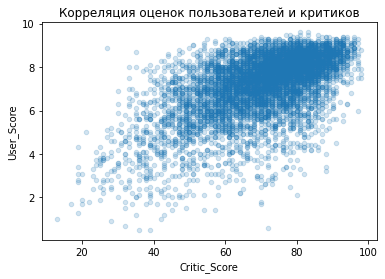

In [ ]:
print('Коэффициент корреляции оценок пользователей и критиков:', data['User_Score'].corr(data['Critic_Score']))
data.plot(y='User_Score',x='Critic_Score',
          kind='scatter', alpha=0.2, title='Корреляция оценок пользователей и критиков');

Взаимосвязь действительно прослеживается, особенно при выставлении высоких оценок. Но с определенной точностью нельзя найти коэффициент отношения между ними.

Создадим новый столбец, отображающий общее количество продаж для игры по всему миру.

In [ ]:
data['total_sales']= data[['NA_sales','EU_sales','JP_sales','Other_sales']].sum(axis=1)

Приведем все названия переменных, <span style="background-color:yellow"> а также значения категориальных переменных к нижнему регистру для простоты восприятия и поиска дубликатов:</span>

In [ ]:
data.columns = data.columns.str.lower()
columns_1=['name', 'platform','genre']
data[columns_1]=data[columns_1].apply(lambda x: x.str.lower())

<span style="background-color:yellow">Проверим датасет на наличие полных дубликатов:</span>

In [ ]:
data.duplicated().sum()

0

<span style="background-color:yellow">Найдем и устраним явные дубликаты в датафрейме:</span>

In [ ]:
subset = ['name', 'platform', 'year_of_release', 'genre']
duplicates = data[data.duplicated(subset=subset, keep=False)]
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


<span style="background-color:yellow">Помимо дубликатов были обнаружены дублирующие NaN, от которых тоже следует иззбавиться, в этом случае я воспользуюсь обычным удалением по индексу, а не drop_duplicates, так как хочу оставить одну строку с `madden nfl 13`.

In [ ]:
data=data.drop([659,14244,16230])

<span style="background-color:yellow">Рассмотрим более подробно переменную с рейтингом ESRB:

In [ ]:
data['rating'].value_counts(dropna=False)

NaN     6764
E       3989
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

- E-(«Everyone») — «Для всех»
- T-(«Teen») — «Подросткам»
- M-(«Mature») — «Для взрослых»
- E10+-(«Everyone 10 and older») — «Для всех от 10 лет и старше»
- EC-(«Early childhood») — «Для детей младшего возраста»
- RP-(«Rating Pending») — «Рейтинг ожидается»
- K-A-(«Everyone») — «Для всех»(устаревшая)
- AO -("Adults Only") - "Только для взрослых"

<span style="background-color:yellow">Можно объеденить повторяющиеся категории, устаревшие значения с новыми и неопределенные заменить пропусками.

In [ ]:
data['rating']=data['rating'].replace({'K-A':'E','AO':'M','RP':pd.NA})

<span style="background-color:yellow">Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Следвательно представленные рейтинги от данного агенства в первую очередь выходят для игр на раынках Северной Америки. Мое предположение заключается в том, что игры, так и не добравшиеся до рынка NA или проданые в незначительном количестве в этом регионе могут быть неотмеченными этой самой организацией.  
    А пропуски в свою очередь предлагаю заменить новым категориальным значением 'no_info'</span>

In [ ]:
data['rating']=data['rating'].fillna('no_info')

**Вывод 2:** <span style="background-color:yellow">Данные предобработаны. Есть теория, что пропуски в названиях игр и году выпуска были допущены случайно;а пропуски в оценках критиков и пользователей в связи с нехваткой данных - либо не была произведена оценка, либо еще не проставлен рейтинг.</span>  
Приступаем к исследовательскому анализу в том виде, который имеем.

### Исследдовательский анализ данных.

#### Закономерности в существовании игровых платформ.  Анализ актуального периода.
Изучим переменную `year_of_release`. Опишим ее числовым методом и построим гистограмму:

In [ ]:
data['year_of_release'].describe()

count    16460.000000
mean      2006.485298
std          5.873339
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

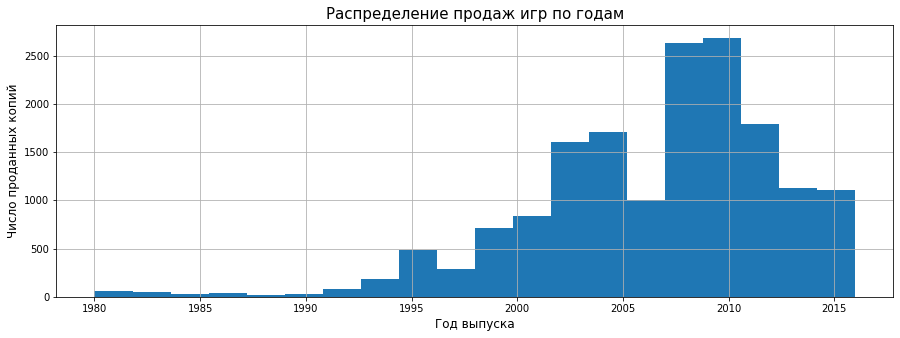

In [ ]:
ax=data['year_of_release'].hist(bins=20, figsize=(15,5))
ax.set_xlabel('Год выпуска', fontsize=12)
ax.set_ylabel('Число проданных копий', fontsize=12)
ax.set_title('Распределение продаж игр по годам', fontsize=15);

Распределение сильно скошено вправо - в период с 2003 по 2016 выпустилось примерно в 3 раза больше игр, чем с 1980 по 2003. Считаю актуальным для дальнейшего исследования период ~ c 1993 по 2016 гг., так как до его начала вышло крайне мало игр.

Рассмотрим его подробнее:

In [ ]:
data=data.loc[data['year_of_release']>=1993]

Найдем платформы-лидеры продаж за отмеченный период:

In [ ]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
ps2     1247.28
x360     961.30
ps3      931.33
wii      891.18
ds       802.77
ps       727.58
ps4      314.14
gba      312.88
psp      290.34
3ds      257.81
pc       253.01
xb       252.66
n64      218.01
gc       197.03
xone     159.32
gb       152.08
snes     124.69
wiiu      82.19
psv       53.81
sat       33.59
dc        15.95
gen        8.78
nes        3.72
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
pcfx       0.03
Name: total_sales, dtype: float64

В лидерах по суммарным продажам игр с 1995 по 2016 являются 6 приставок - PlayStation 1/2/3 , Xbox 360, Nintendo Wii и  Nintendo DS. Рассмотрим динамику изменения уровня продаж игр на эти приставки с течением времени.

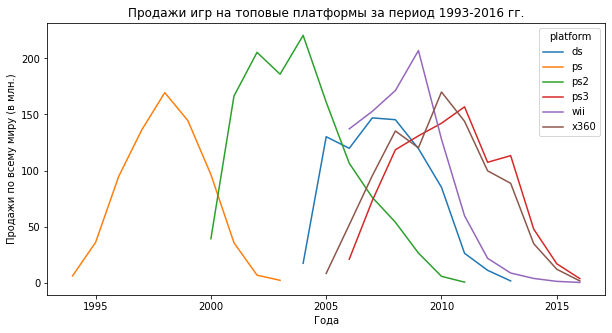

In [ ]:
top_platforms=data.loc[data['platform'].isin(['ps2','x360','ps3','wii','ds','ps'])]
top_platforms_stat=top_platforms.pivot_table(index='year_of_release',columns='platform',values='total_sales', aggfunc='sum')
top_platforms_stat.plot(kind='line',figsize=(10, 5))
plt.title('Продажи игр на топовые платформы за период 1993-2016 гг.')
plt.xlabel('Года')
plt.ylabel('Продажи по всему миру (в млн.)')
plt.show()

Примерный срок существования платформы - **10 лет**. Пик продаж игр приходится примерно на **5 год** после выпуска платформы, для которой они предназначены. Затем наблюдается постепеннное снижения объема продаж.

Чтобы делать какие-либо прогнозы на 2017 год необходимо детально рассмотреть предшествующие 3 года и выяснить какие платформы находятся на пике популярности, какие уже угасают, а какие  появились недавно и ждут своего звездного часа.

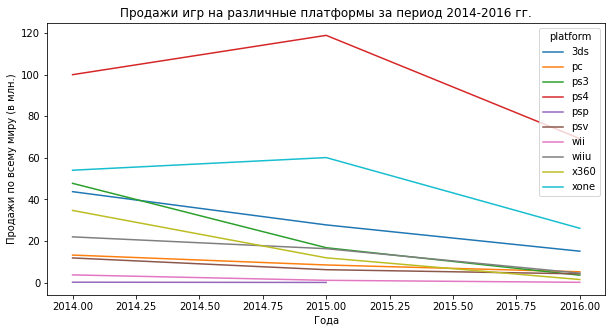

In [ ]:
data=data.loc[data['year_of_release']>=2014]
data.pivot_table(index='year_of_release',columns='platform',
                 values='total_sales',aggfunc='sum').plot(kind='line', figsize=(10,5));
plt.title('Продажи игр на различные платформы за период 2014-2016 гг.')
plt.xlabel('Года')
plt.ylabel('Продажи по всему миру (в млн.)')
plt.show()

**Игровые приставки:** 2013 год ознаменовался выходом двух легендарных приставок - PS4 и Xbox One, которые пришли на замену PS3 и Xbox 360 соответсвенно. За последующие 3 года после  выхода у игр для этих двух приставок наблюдается грандиозный рост продаж, а у их предшественников резкий спад - к началу 2016 продажа игр на эти платформы практически прекратилась.

**Портативные приставки:** У портативных игровых приставок  WiiU, PSV наблюдается стабильный невысокий уровень, одна появилась в конце 2011 года, вторая в 2012. Несмотря на то, что это относительно новые приставки - они не пользуются большим спросом. Продажи игр еще одной портативной игровой приставки - Nintendo 3DS -  заметно просели (хотя на начало исследования она была довольно популярной), но все еще  держатся на довольно высоком уровне в 20 млн экземплеров на 2016 год.

**Персональные компьютеры:** У игр выходящих на PC наблюдается  спад продаж за выбранный период, но в силу широкого распространения компьютеров в повседневности предлагаю не исключать PC из дальнейшего исследования.  

**Вывод 3.1:** Наиболее потенциально прибыльными платформами в 2017 году можно считать PS4 и Xbox One.

Построим визуализацию в формате графиков **boxplot** для каждой из платформ и проведем сравнение.

          count      mean       std   min     25%    50%     75%    max
platform                                                               
3ds       212.0  0.408868  1.188368  0.01  0.0300  0.090  0.2500  11.68
pc        151.0  0.179139  0.329359  0.01  0.0200  0.060  0.2000   3.05
ps3       219.0  0.311324  0.633059  0.01  0.0400  0.110  0.3250   5.27
ps4       376.0  0.766356  1.614969  0.01  0.0575  0.185  0.6900  14.63
psp        13.0  0.027692  0.027735  0.01  0.0100  0.020  0.0200   0.09
psv       295.0  0.075932  0.141591  0.01  0.0200  0.040  0.0900   1.96
wii        11.0  0.460909  0.625451  0.01  0.0350  0.180  0.7550   2.01
wiiu       73.0  0.588767  1.161467  0.01  0.0500  0.190  0.5700   7.09
x360      111.0  0.434414  0.628967  0.01  0.0700  0.180  0.5050   4.28
xone      228.0  0.615614  1.046513  0.01  0.0500  0.205  0.6325   7.39


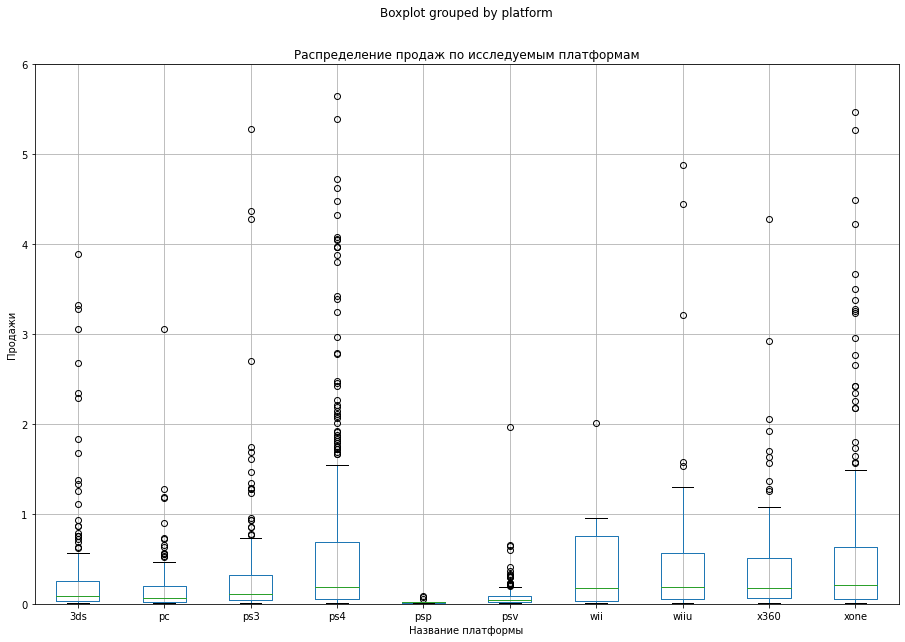

In [ ]:
print(data.groupby('platform')['total_sales'].describe())
data.boxplot(column=['total_sales'], by='platform',figsize=(15,10)).set_ylim([0,6]);
plt.title('Распределение продаж по исследуемым платформам')
plt.xlabel('Название платформы')
plt.ylabel('Продажи');

<span style="background-color:yellow"> Самый большой межквартильный размах у PS4, Xbox и приставок Wii, что может обозначать более длинный ряд успешно продающихся игр на эти приставки, в сравнении с остальными устройствами. Минимальное количество выбросов наблюдается у приставок Wii и Xbox, что свидетельствует о более стабильном уровне продаж по ходу исследования. Самые большие выбросы замечены у приставок PlayStation и Xbox - следовательно эти приставки доходили до пика продаж, до которого не дошла ни одна другая приставка в сравнении. </span>

#### Корреляция количества продаж и отзывов на игру.

Предлагаю изучить показатели лидеров среди игровых платформ на начало 2016 года - PS4 и Xbox. А именно значение корреляции продаж и отзывов критиков и пользователей. А также провести сравнение с соответствующими метриками у игр на остальные платформы.

Коэффициент корреляции продаж игр на PS4 и отзывов критиков: 0.4
Коэффициент корреляции продаж игр на PS4 и отзывов пользователей: -0.04


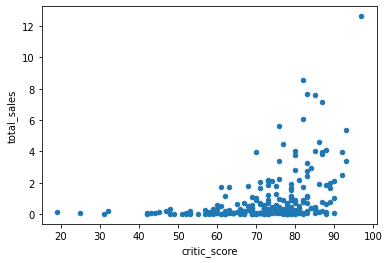

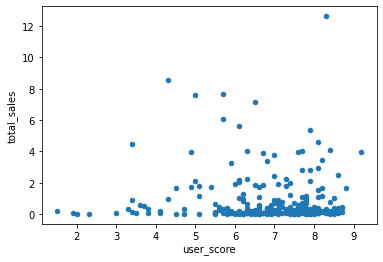

In [ ]:
PS4_data=data.loc[data['platform']=='ps4']
print('Коэффициент корреляции продаж игр на PS4 и отзывов критиков:',
      PS4_data['total_sales'].corr(PS4_data['critic_score']).round(2))
print('Коэффициент корреляции продаж игр на PS4 и отзывов пользователей:',
      PS4_data['total_sales'].corr(PS4_data['user_score']).round(2))
PS4_data.plot(y='total_sales',x='critic_score',kind='scatter');
PS4_data.plot(y='total_sales',x='user_score',kind='scatter');

Коэффициент корреляции продаж игр на Xbox One и отзывов критиков: 0.43
Коэффициент корреляции продаж игр на Xbox One и отзывов пользователей: -0.07


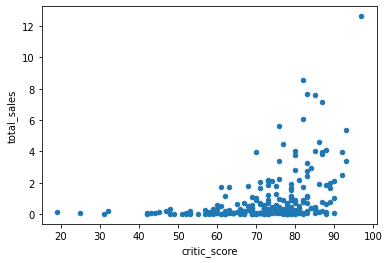

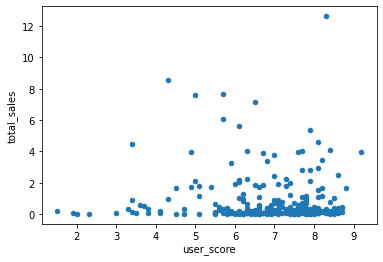

In [ ]:
Xone_data=data.loc[data['platform']=='xone']
print('Коэффициент корреляции продаж игр на Xbox One и отзывов критиков:',
      Xone_data['total_sales'].corr(Xone_data['critic_score']).round(2))
print('Коэффициент корреляции продаж игр на Xbox One и отзывов пользователей:',
      Xone_data['total_sales'].corr(Xone_data['user_score']).round(2))
PS4_data.plot(y='total_sales',x='critic_score',kind='scatter');
PS4_data.plot(y='total_sales',x='user_score',kind='scatter');

**Вывод 3.2:** Как мы можем заметить наиболее перспективные платформы на конец 2016 года имеют очень схожие показатели корреляции оценок критиков/пользователей и продаж:
- как и следовало ожидать, при хороших оценках критиков увеличивается показатель продаж, как на PS, так и на Xbox;
- а вот по оценкам пользователей тяжело сделать какие-либо утверждения, так как корреляция в обоих случаях практически отсутствует.

#### Распределение игр по жанрам.
<span style="background-color:yellow">Найдем лидеров в переменной `genre` и визиализируем данные:

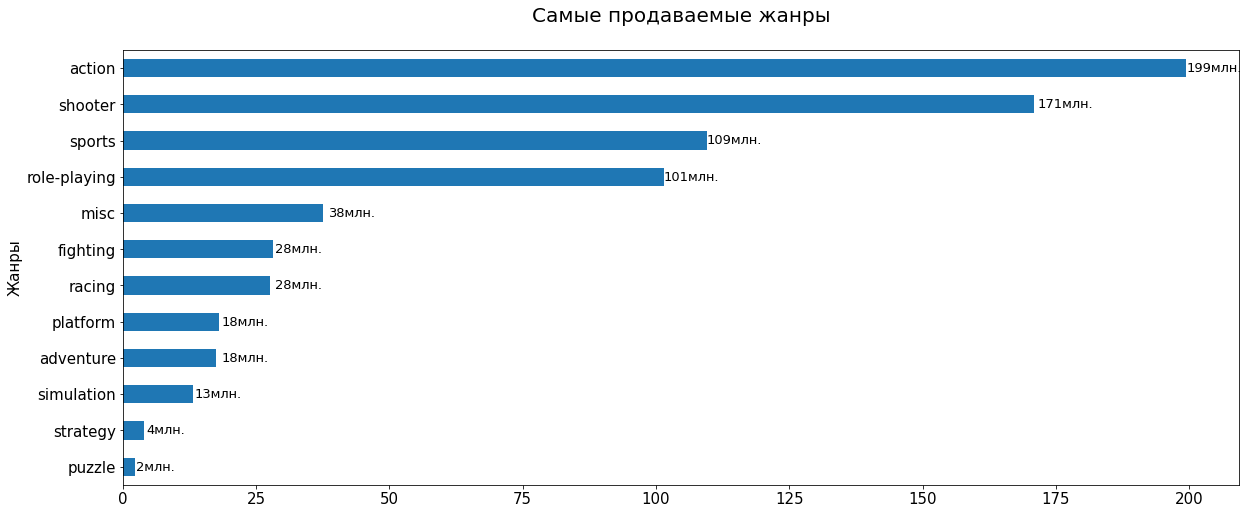

In [ ]:
data_genres=data.groupby('genre')['total_sales']
genres_rating=data_genres.sum().sort_values(ascending=True).to_frame()
ax1=genres_rating.plot(
    kind='barh',rot=0, figsize=(20,8),
    title='Ощий рейтинг популярности жанров',fontsize=15, legend=None);
plt.ylabel('Жанры', fontsize=15)
ax1.set_title('Самые продаваемые жанры'+'\n',fontsize = 20, color='black')
genres_rating.total_sales=genres_rating.total_sales.round().astype(int)
for i, v in enumerate(genres_rating.total_sales):
    ax1.text(v+0.5, i-0.1, str(v)+'млн.', color='black', fontweight='normal',fontsize = 13);

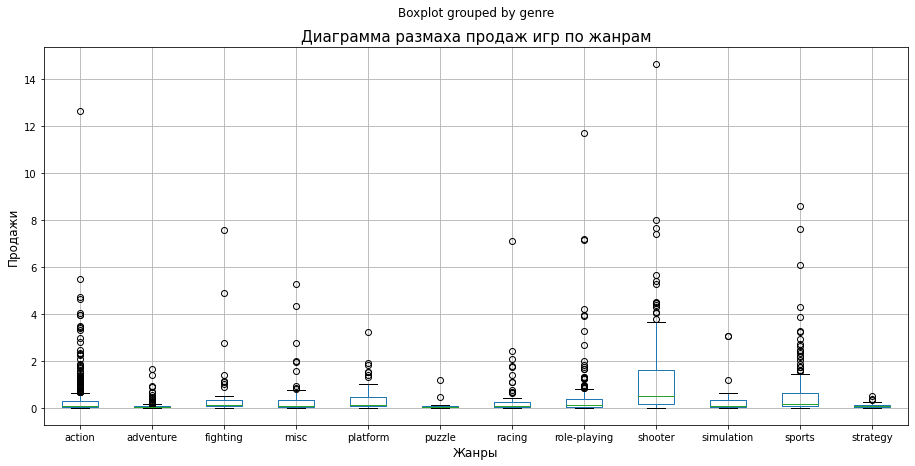

In [ ]:
data.boxplot(column='total_sales', by='genre', figsize=(15,7))
plt.title('Диаграмма размаха продаж игр по жанрам', fontsize=15)
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

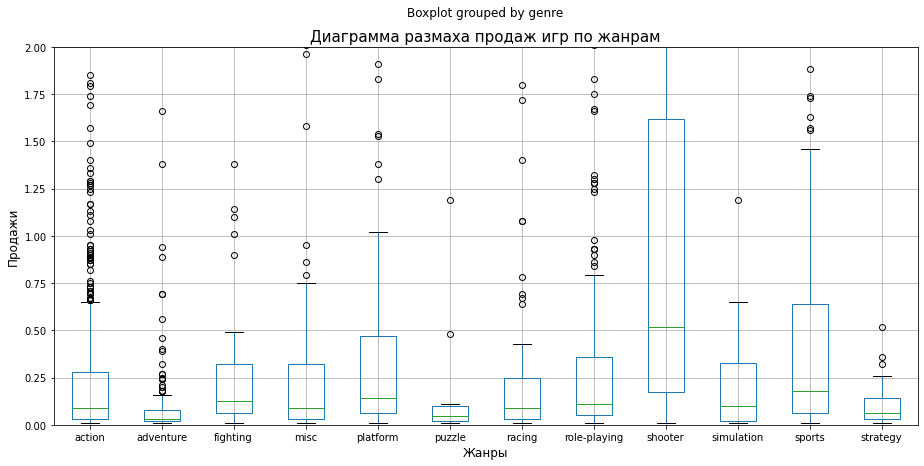

In [ ]:
data.boxplot(column='total_sales', by='genre', figsize=(15,7)).set_ylim([0,2])
plt.title('Диаграмма размаха продаж игр по жанрам', fontsize=15)
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

**Вывод 3.3:** <span style="background-color:yellow">Самыми популярными и продаваемыми играми являются Экшены (~ 200 млн продаж). Второе место остается за Шутерами (~ 170 млн продаж) и третье - игры в жанре Спорт и RPG (~ 100 млн продаж). В аутсайдерах стратегии и пазлы🥴.  
Анализ диаграмм размаха в разных масштабах показал следующее:
- <span style="background-color:yellow">у жанров Экшн, Спорт, Приключения и RPG большое количество выбросов - что свидетельствует о том, разные игры этих жанров могут продаваться нестабильно, с большим отклонением от среднего уровня продаж;
- <span style="background-color:yellow">практически у всех жанров одинаковый показатель медианных продаж, резко отличается от остальных - жанр Шутер - можно предположить, что в этом жанре в основном выпускаются бестселлеры - они очень популярны и продаваемы, а их копии разлетаются по миру в огромном количестве. Также можно сказать про игры жанра Спорт и Платформеры, но уже в меньшей степени :)

### Портрет пользователя регионов NA, EU и JP.

Зафиксируем число продаж по регионам для дальнейших выводов.

In [ ]:
print('Число продаж игр в регионе Северная Америка:',data['na_sales'].sum())
print('Число продаж игр в регионе Европа:',data['eu_sales'].sum())
print('Число продаж игр в регионе Япония:',data['jp_sales'].sum())
print('Число продаж игр в остальных регионах:',data['other_sales'].sum())

Число продаж игр в регионе Северная Америка: 284.06000000000006
Число продаж игр в регионе Европа: 270.67999999999995
Число продаж игр в регионе Япония: 93.09
Число продаж игр в остальных регионах: 81.62


<span style="background-color:orange">Создадим отдельные объекты сириес для каждого региона (я исключил создание общего датафрейма, так как топ-5 у каждого региона может быть свой) и построим круговые диаграммы для трех признаков, по которым определим в дальнейшем портрет среднестатистического игрока. Рассмотрим самые популярне платформы, жанры и рейтинги игр.

<span style="background-color:orange"> Топ-5 платформ для каждого региона:

In [ ]:
sales_by_platforms_NA = data.groupby('platform')['na_sales'].sum()# для Америки
top_NA_platforms = sales_by_platforms_NA.sort_values( ascending=False)[:5]
other_platforms_NA = pd.Series(sales_by_platforms_NA.sort_values(ascending=False)[5:].sum(axis=0))
other_platforms_NA.index = ['other']
top_platforms_NA = top_NA_platforms.append(other_platforms_NA)


sales_by_platforms_EU = data.groupby('platform')['eu_sales'].sum()# для Европы
top_EU_platforms = sales_by_platforms_EU.sort_values( ascending=False)[:5]
other_platforms_EU = pd.Series(sales_by_platforms_EU.sort_values(ascending=False)[5:].sum(axis=0))
other_platforms_EU.index = ['other']
top_platforms_EU = top_EU_platforms.append(other_platforms_EU)


sales_by_platforms_JP = data.groupby('platform')['jp_sales'].sum()# для Японии
top_JP_platforms = sales_by_platforms_JP.sort_values( ascending=False)[:5]
other_platforms_JP = pd.Series(sales_by_platforms_JP.sort_values(ascending=False)[5:].sum(axis=0))
other_platforms_JP.index = ['other']
top_platforms_JP = top_JP_platforms.append(other_platforms_JP)

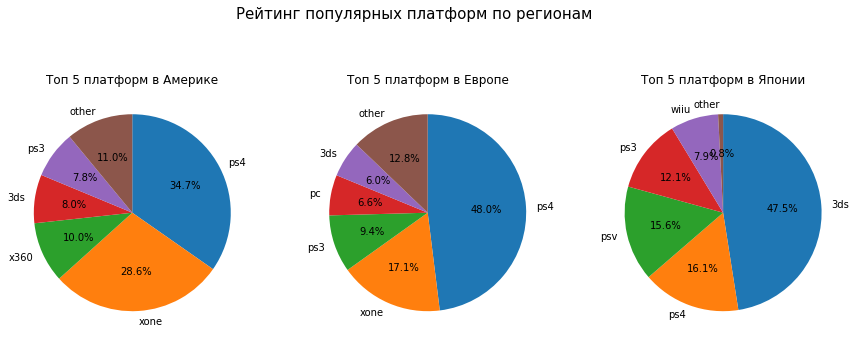

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))#создаем фигуру с тремя поддиаграммами

ax1.pie(top_platforms_NA.values, labels=top_platforms_NA.index, startangle=90,
        counterclock=False, autopct='%1.1f%%')#строим круговую диаграмму для Америки
ax1.set_title('Топ 5 платформ в Америке')
ax2.pie(top_platforms_EU.values, labels=top_platforms_EU.index, startangle=90,
        counterclock=False, autopct='%1.1f%%')#строим круговую диаграмму для Европы
ax2.set_title('Топ 5 платформ в Европе')
ax3.pie(top_platforms_JP.values, labels=top_platforms_JP.index, startangle=90,
        counterclock=False, autopct='%1.1f%%')#строим круговую диаграмму для Японии
ax3.set_title('Топ 5 платформ в Японии')

fig.suptitle('Рейтинг популярных платформ по регионам', fontsize=15)# добавляем заголовок для всей фигуры

plt.show()# показываем диаграммы

- Американцы чаще всего выбирали PS4 и Xbox One примерно в равных долях;
- Европейцы намного больше предпочитают PS4, на втором месте Xbox One;
- Японцы предпочли портативные приставки полноценным консолям и играли в Nintendo 3DS, на втором месте PS4 и PSV.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
Стоит исключить предупреждения. Иногда их бывает слишком много, поэтому важно уметь их скрывать. В этом тебе поможет библиотека warnings. Попробуй найти подходящий метод и убрать предупреждения.
        

![image.png](attachment:image.png)        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br />
    <font size="3", color = "black">
<br /> Добавил библиотеку в шапку работы.

<span style="background-color:orange">Теперь создадим отдельные объекты сириес топ-5 жанров для каждого региона:

In [ ]:
sales_by_genre_NA = data.groupby('genre')['na_sales'].sum()# для Америки
top_NA_sales = sales_by_genre_NA.sort_values( ascending=False)[:5]
other_sales_NA = pd.Series(sales_by_genre_NA.sort_values(ascending=False)[5:].sum(axis=0))
other_sales_NA.index = ['other']
top_genres_NA = top_NA_sales.append(other_sales_NA)


sales_by_genre_EU = data.groupby('genre')['eu_sales'].sum()# для Европы
top_EU_sales = sales_by_genre_EU.sort_values( ascending=False)[:5]
other_sales_EU = pd.Series(sales_by_genre_EU.sort_values(ascending=False)[5:].sum(axis=0))
other_sales_EU.index = ['other']
top_genres_EU = top_EU_sales.append(other_sales_EU)


sales_by_genre_JP = data.groupby('genre')['jp_sales'].sum()# для Японии
top_JP_sales = sales_by_genre_JP.sort_values( ascending=False)[:5]
other_sales_JP = pd.Series(sales_by_genre_JP.sort_values(ascending=False)[5:].sum(axis=0))
other_sales_JP.index = ['other']
top_genres_JP = top_JP_sales.append(other_sales_JP)

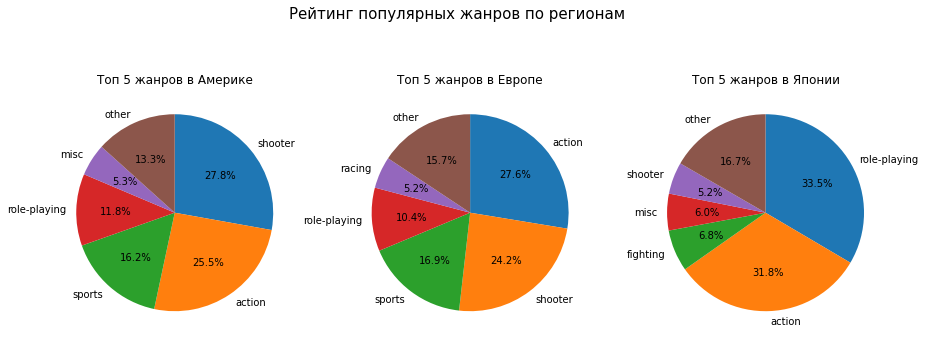

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
ax1.pie(top_genres_NA.values, labels=top_genres_NA.index, startangle=90,
        counterclock=False, autopct='%1.1f%%')
ax1.set_title('Топ 5 жанров в Америке')
ax2.pie(top_genres_EU.values, labels=top_genres_EU.index, startangle=90,
        counterclock=False, autopct='%1.1f%%')
ax2.set_title('Топ 5 жанров в Европе')
ax3.pie(top_genres_JP.values, labels=top_genres_JP.index, startangle=90,
        counterclock=False, autopct='%1.1f%%')
ax3.set_title('Топ 5 жанров в Японии')

fig.suptitle('Рейтинг популярных жанров по регионам', fontsize=15)

plt.show()

- Американцы и европейцы отдали свое предпочтение шутерам и экшн-играм, на втором месте спорт;
- Японцы чаще всего играли в RPG и экшны

*Для группировки по рейтингу снова обратимся к условным обозначениям в системе ESRB:*

In [ ]:
data['rating'].value_counts()

no_info    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

- T-(«Teen») — «Подросткам»
- M-(«Mature») — «Для взрослых»
- E-(«Everyone») — «Для всех»
- E10+-(«Everyone 10 and older») — «Для всех от 10 лет и старше»
- no_info - нет определенной информации

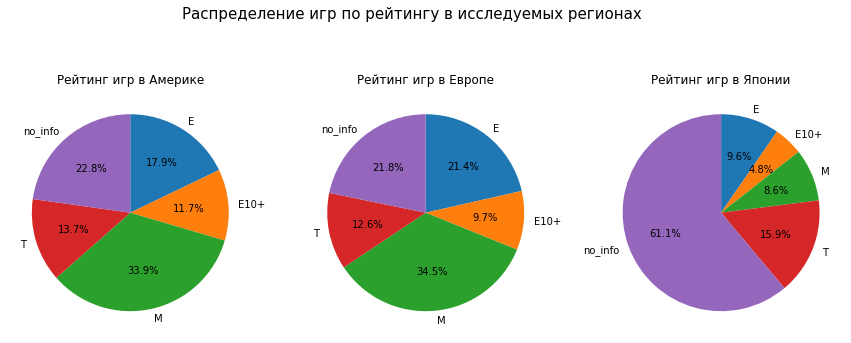

In [ ]:
rating_NA=data.groupby('rating')['na_sales'].sum()
rating_EU=data.groupby('rating')['eu_sales'].sum()
rating_JP=data.groupby('rating')['jp_sales'].sum()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
ax1.pie(rating_NA.values, labels=rating_NA.index, startangle=90,
        counterclock=False, autopct='%1.1f%%')
ax1.set_title('Рейтинг игр в Америке')
ax2.pie(rating_EU.values, labels=rating_EU.index, startangle=90,
        counterclock=False, autopct='%1.1f%%')
ax2.set_title('Рейтинг игр в Европе')
ax3.pie(rating_JP.values, labels=rating_JP.index, startangle=90,
        counterclock=False, autopct='%1.1f%%')
ax3.set_title('Рейтинг игр в Японии')

fig.suptitle('Распределение игр по рейтингу в исследуемых регионах', fontsize=15)

plt.show()

- Американцы, как и европейцы предпочитают играть в игры с рейтингом "М" и "E", также для многих игр рейтинг неопределен;
- <span style="background-color:yellow">Для большинства игр в которые играют в Японии рейтинг неопределен, что может говорить нам о том, что японцы предпочитают играть в игры для внутреннего рынка, особо неизвестные зарубежом.

**Вывод 4:**  
*Портрет пользователя из региона NA:*  
Среднестатистический игрок из Америки практически равносильно выбирает PS4 и Xbox One. Любимые жанры - шутер или экшн с рейтингом "М".  

*Портрет пользователя из региона EU:*  
Среднестатистический игрок из Европы зачастую выбирает PS4 . Любимые жанры - шутер или экшн с рейтингом "М".  

*Портрет пользователя из региона JP:*  
Среднестатистический игрок из Японии предпочитает портативную приставку - Nintendo 3DS. Любимые жанры - RPG или экшн, выпускаемые для внутреннего рынка.

### Проверка гипотез.

Следующий  шаг в исследовательской работе - проверка некоторых гипотез.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
*Hулевая гипотеза:* Нет статистически значимых различий в среднем показателе пользовательского рейтинга платформ Xbox One и PC.  
*Альтернативная гипотеза:* В средних показателях пользовательского рейтинга платформ Xbox One и PC есть статистически значимые различия.

In [ ]:
from scipy import stats as st
xbox_one_user_score=(data
                     .loc[data['platform']=='xone']['user_score']).dropna()
pc_one_user_score=(data
                   .loc[data['platform']=='pc']['user_score']).dropna()
alpha = 0.05
results = st.ttest_ind(xbox_one_user_score, pc_one_user_score, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


<span style="background-color:yellow">Применив для статистического анализа Критерий Стьюдента (t-тест) при установленном уровне значимости 5% нам не удалось отвергнуть нулевую гипотезу. Следовательно, принимаем гипотезу **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**. В данном случае, p-value равно 0.11601398086668832, что говорит о том, что вероятность получить наблюдаемый результат (или более экстремальный) при условии, что нулевая гипотеза верна, составляет 11.6%.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

*Hулевая гипотеза:* Нет статистически значимых различий в среднем показателе пользовательского рейтинга у игр жанра Экшн и игр жанра Спорт.  
*Альтернативная гипотеза:* В средних показателях пользовательского рейтинга у игр жанра Экшн и игр жанра Спорт есть статистически значимые различия.

In [ ]:
from scipy import stats as st
xbox_one_user_score=(data
                     .loc[data['genre']=='action']['user_score']).dropna()
pc_one_user_score=(data
                   .loc[data['genre']=='sports']['user_score']).dropna()
alpha = 0.05
results = st.ttest_ind(xbox_one_user_score, pc_one_user_score, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Следует принять гипотезу, что **средние пользовательские рейтинги жанров Action и Sports разные**, так  как применив критерий Стьюдента (t-тест) мы отвергли нулевую гипотезу - *Нет статистически значимых различий в среднем показателе пользовательского рейтинга у игр жанра Экшн и игр жанра Спорт.<span style="background-color:yellow">В этом случае, значение p-value настолько мало, что вероятность получить наблюдаемый результат (или более экстремальный) при условии, что нулевая гипотеза верна, также крайне мал.

**Вывод 5:** Как можно заметить для проверки гипотез был использован критерий Стьюдента (t-test), так как проводилась проверка значимости различий между двумя средними значениями выборок. Уровень статистической значимости равен 5%, так как он является стандартным уровнем, который часто используется в научных исследованиях. С помощью этого метода можно проверить неограниченное количество гипотез для заданного датасета.

### Общий вывод.

Проведя исследование группы открытых исторических данных о продажах игр, мной были выявлены некоторые закономерности, определяющие успешность игр, принимая во внимание которые, есть шанс сплланировать удачную рекламную компанию.
В основной части исследования, я пользовался данными за <span style="background-color:yellow">2014-2016 гг.</span> (считаю, что это актуальный период для составления прогноза на 2017 г.) и проанализировал среднюю продолжительность "жизни" игровых приставок прошлых лет и пик их популярности - 10 и 5 лет соответсвенно.  
**🤩 Самые популярные платформы на начало 2016 года:**
Изучив продажи игр на различные платформы, я выявил двух абсолютных лидеров - PS4 и XboxOne. Эти приставки были выпущены в 2013 году, и являются приемниками легендарных PS3 и Xbox360. Если верить статистике, сейчас они находятся на этапе своего рассвета и еще не достигли пика популярности.  
Портативные приставки переживают не лучшие времена, и из тех, что представлены сейчас на рынке WiiU и PSV - относительно новые продукты, но так и не завоевавшие сердца игроманов (в сравнении с игровыми приставками), хотя сохраняющие стабильный уровень продаж на протяжении 5 лет с момента выпуска - 20 млн. копий ежегодно.  
Игры на PC будут выходить всегда, так как в отличии от вышеназванных приставок - комплектующие PC модернезируется ежегодно, но в срезе популярности среди игроманов - все больше предпочтений отдается игровым приставкам, о чем свидетельствуют представленные мной в исследовании графики и промежуточные выводы.  
**🤠 Распределение по жанрам:**
В исходных данных представлена информация о жанрах, среди которых есть лидеры и аутсайдеры. Исходя из агрегированных данных о продажах, cамыми популярными и продаваемыми играми являются Экшены (~ 200 млн продаж). Второе место остается за Шутерами (~ 170 млн продаж) и третье место делят игры в жанре RPG и Спорт (~ по 100 млн продаж). Явные аутсайдеры исследования - игры в жанре <span style="background-color:yellow">Пазлы и Стратегии. Также была выявленна интересная особенность, основу игр жанров Шутер, Спорт и Платформер составляют игры с большим показателем продаж, что продемонстрировало нам среднее медианное значение на графиках boxplot, следовательно в этой категории больше всего игр-бестселлеров!</span>

**😐  Зависимость продаж от оценки критиков и пользователей:**  
<span style="background-color:yellow">Из-за нехватки данных нельзя со стопроцентной точностью определить, влияют ли оценки критиков и пользователей на уровень продаж на всех платформах, но можно выделить определенную закономерность у лидеров рынка (PS4 b XboxOne) - высокие оценки критиков в некоторых случаях могут увеличить объемы продаж игр; что с трудом можно сказать об оценках пользователей - нулевой уровень корреляции не позволяет сделатьоднозначный вывод.</span>

**🤓 Портрет среднестатичтического игрока по регионам:**
<span style="background-color:yellow">Так как наша компания реализует игры по всему миру, для оптимального прогноза на 2017 год был выделен портрет среднестатистического пользователя по регионам с наивысшими показателем продаж. Большинство копий за 3 года было продано в регионах Северной Америки - 284 млн.,  Европе - 270 млн. и Японии - 93 млн.  
Соответсвенно:
- игроки из Америки выбирают игры жанров <span style="background-color:yellow">Экшн, Шутер и Спорт</span> рейтинга "М" примерно в равных долях на платформах  PS4, Xbox;
- игроки из Европы также выбирают игры жанров <span style="background-color:yellow">Экшн, Шутер и Спорт</span> рейтинга "М" но уже предпочтительнее на  платформах  PS4;
- выделяются игроки из Японии - они предпочитают игры жанров <span style="background-color:yellow">RPG и Экшн местного производства на портативных приставках Nintendo 3DS.</span>

**❗️❗️❗️ Рекомендации на 2017 год:**  
Проанализировав выявленные закономерности можно составить рекомендации для маркетинговым стратегий по регионам:
- Разрабатывая рекламную стратегию в Европейском и Северо-Американском регионах основной упор сделать на новинки и зарекомендовавшие себя бестселлеры жанров Экшн, Шутер и Спорт рейтинга "М" на платформах PS4 и PC; принимать во внимание игры с наивысшими оценками от критиков и запускать их в рекламу. Не стоит уделять особое внимание и тем более выделять большие средства на продвижение в рекламной компании играм на портативных приставках, а также играм жанров Стратегия и Пазлы (хотя по личному опыту, есть очень стоящие продукты в этом сегменте🚀)
-  В Азиатском регионе, а в частности в Японии в силу культурных особенностей и предпочтений ситуация обстоит иначе: для успеха рекламной компании ее стоит развернуть вокруг <span style="background-color:yellow">внутренних игровых продуктов жанра RPG, выходящих на портативные приставки -  Nintendo 3DS и относительно новые PSV и WiiU.</span>

**❓❓❓ Рекомендации для дальнейших исследований:**  
Хотя задача по определению приоритетов для рекламной компании 2017 года исполнена, я считаю необходимым провести более глубокое исследование по имеющимся данным.
- Один из наиболее важных, но упущенный при постановке задач, момент - анализ игр непосредственно по названиям. Проведя исследование, мы можем выделить абсолютных лидеров продаж на каждой платформе и в каждом регионе. Далее сможем изучить - одиночный ли это продукт или существует в рамках медиафраншизы. И основываясь на этих данных, а также анонсах новых смежных игр или игр из одной вселенной, уже более конкретно формировать запросы для рекламной компании.
- <span style="background-color:yellow">Также в будущих исследованиях стоит учитывать ход технологического прогресса - появления игр VR, AR, а также развитие игр для мобильных телефонов.</span>